In [1]:
import os
import math

import pandas as pd
from numpy import arange, mean, std
from sklearn import preprocessing
import numpy as np

In [2]:
# import csv
df = pd.read_csv("C:\\Users\\giuli\\Desktop\\ds Left\\merged\\mergedFileLeft.csv")
df
# print(df.describe())

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin,View,User,Hand,Smartphone
0,0.137554,0.064636,0.356773,0.127287,1.051056,-0.110138,2.961190,3.021484,0.322891,0.104259,...,1.0,1.0,0.0,0.0,1.0,1.0,t,Chiara,LEFT,REALME 7
1,0.590167,0.679947,0.403956,0.163180,1.103729,-0.134079,2.469620,2.303223,0.459437,0.211083,...,1.0,1.0,0.0,0.0,1.0,1.0,h,Chiara,LEFT,REALME 7
2,0.331192,0.325607,0.397967,0.158378,1.027115,0.009567,2.721668,2.700653,0.293869,0.086359,...,1.0,1.0,0.0,0.0,1.0,1.0,e,Chiara,LEFT,REALME 7
3,-0.447721,-0.495605,0.349624,0.122237,0.090973,-0.988815,2.018710,2.047043,0.283701,0.080486,...,1.0,1.0,0.0,0.0,1.0,1.0,,Chiara,LEFT,REALME 7
4,0.395437,0.402222,0.179063,0.032064,0.622482,0.074219,1.259748,1.280899,0.191081,0.036512,...,1.0,1.0,0.0,0.0,1.0,1.0,r,Chiara,LEFT,REALME 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,0.292690,0.304062,0.022743,0.000517,0.304062,0.258575,0.882263,0.871490,0.021545,0.000464,...,1.0,1.0,0.0,0.0,1.0,1.0,,Chiara,LEFT,REALME 7
16758,-0.699108,-0.713470,0.028725,0.000825,-0.656021,-0.713470,1.756138,1.903381,0.294487,0.086723,...,1.0,1.0,0.0,0.0,1.0,1.0,z,Chiara,LEFT,REALME 7
16759,-1.127679,-1.065430,0.085239,0.007266,-1.065430,-1.221054,1.631400,1.620865,0.014425,0.000208,...,1.0,1.0,0.0,0.0,1.0,1.0,a,Chiara,LEFT,REALME 7
16760,0.440536,0.440536,0.000000,0.000000,0.440536,0.440536,1.857895,1.857895,0.000000,0.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,c,Chiara,LEFT,REALME 7


In [3]:
# Normalization between -1 and 1
df_norm = df.copy()

notnorm = ['View','User', 'Hand', 'Smartphone']
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

for col in list(df_norm.columns):
    if col in notnorm:
        continue
    x = df_norm[[col]].values.astype(float) # cast to float
    x_scaled = min_max_scaler.fit_transform(x) # fit data and transform it
    df_norm[[col]] = x_scaled

In [4]:
df_norm.describe()
df = df_norm
df

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin,View,User,Hand,Smartphone
0,-0.132653,-0.147185,-0.603221,-0.921283,0.032926,-0.109151,0.273847,0.271777,-0.630290,-0.931657,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,t,Chiara,LEFT,REALME 7
1,-0.021683,-0.003086,-0.550748,-0.899086,0.045203,-0.114663,0.140869,0.087105,-0.473945,-0.861633,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,h,Chiara,LEFT,REALME 7
2,-0.085178,-0.086068,-0.557407,-0.902056,0.027346,-0.081589,0.209052,0.189288,-0.663520,-0.943391,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,e,Chiara,LEFT,REALME 7
3,-0.276150,-0.278387,-0.611171,-0.924406,-0.190848,-0.311467,0.018891,0.021238,-0.675163,-0.947240,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7
4,-0.069426,-0.068126,-0.800858,-0.980171,-0.066965,-0.066703,-0.186420,-0.175745,-0.781213,-0.976066,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,r,Chiara,LEFT,REALME 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,-0.094617,-0.091114,-0.974706,-0.999680,-0.141182,-0.024254,-0.288535,-0.281008,-0.975331,-0.999696,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7
16758,-0.337784,-0.329409,-0.968054,-0.999490,-0.364956,-0.248069,-0.052138,-0.015699,-0.662813,-0.943152,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,z,Chiara,LEFT,REALME 7
16759,-0.442860,-0.411833,-0.905203,-0.995507,-0.460381,-0.364941,-0.085882,-0.088337,-0.983483,-0.999864,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,a,Chiara,LEFT,REALME 7
16760,-0.058369,-0.059153,-1.000000,-1.000000,-0.109373,0.017642,-0.024612,-0.027394,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,c,Chiara,LEFT,REALME 7


In [5]:
# add letters
letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"," "]
# add distances from left margin (xAxis) and top margin (yAxis) (start from 1)
yAxis = [ 1,  2,  2,  1,  0,  1,  1,  1,  0,  1,  1,  1,  2,  2,  0,  0,  0,  0,  1,  0,  0,  2,  0,  2,  0,  2, 3]
xAxis =[ 1.5,  6,  4,  3.5,  3,  4.5,  5.5, 6.5,  8,  7.5, 8.5,  9.5,  8,  7,  9,  10,  1,  4,  2.5,  5,  7,  5,  2,  3,  6,  2, 5]

# pair of distances for letters
dict_letters = {}
for i, let in enumerate(letters):
    dict_letters[let] = (xAxis[i], yAxis[i])

center = "a"
dict_dist = {}
for let in letters:
    dict_dist[let] = math.sqrt((dict_letters[center][0] - dict_letters[let][0])**2 + (dict_letters[center][1] - dict_letters[let][1])**2)

# write in df distances and dist from center
df.loc[:,'x'] = df.apply(lambda x: dict_letters[x['View']][0], axis=1)
df.loc[:,'y'] = df.apply(lambda x: dict_letters[x['View']][1], axis=1)
df.loc[:,'dist'] = df.apply(lambda x: dict_dist[x['View']], axis=1)
df

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreVar,PreMax,PreMin,View,User,Hand,Smartphone,x,y,dist
0,-0.132653,-0.147185,-0.603221,-0.921283,0.032926,-0.109151,0.273847,0.271777,-0.630290,-0.931657,...,-1.0,-1.0,-1.0,t,Chiara,LEFT,REALME 7,5.0,0,3.640055
1,-0.021683,-0.003086,-0.550748,-0.899086,0.045203,-0.114663,0.140869,0.087105,-0.473945,-0.861633,...,-1.0,-1.0,-1.0,h,Chiara,LEFT,REALME 7,6.5,1,5.000000
2,-0.085178,-0.086068,-0.557407,-0.902056,0.027346,-0.081589,0.209052,0.189288,-0.663520,-0.943391,...,-1.0,-1.0,-1.0,e,Chiara,LEFT,REALME 7,3.0,0,1.802776
3,-0.276150,-0.278387,-0.611171,-0.924406,-0.190848,-0.311467,0.018891,0.021238,-0.675163,-0.947240,...,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7,5.0,3,4.031129
4,-0.069426,-0.068126,-0.800858,-0.980171,-0.066965,-0.066703,-0.186420,-0.175745,-0.781213,-0.976066,...,-1.0,-1.0,-1.0,r,Chiara,LEFT,REALME 7,4.0,0,2.692582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,-0.094617,-0.091114,-0.974706,-0.999680,-0.141182,-0.024254,-0.288535,-0.281008,-0.975331,-0.999696,...,-1.0,-1.0,-1.0,,Chiara,LEFT,REALME 7,5.0,3,4.031129
16758,-0.337784,-0.329409,-0.968054,-0.999490,-0.364956,-0.248069,-0.052138,-0.015699,-0.662813,-0.943152,...,-1.0,-1.0,-1.0,z,Chiara,LEFT,REALME 7,2.0,2,1.118034
16759,-0.442860,-0.411833,-0.905203,-0.995507,-0.460381,-0.364941,-0.085882,-0.088337,-0.983483,-0.999864,...,-1.0,-1.0,-1.0,a,Chiara,LEFT,REALME 7,1.5,1,0.000000
16760,-0.058369,-0.059153,-1.000000,-1.000000,-0.109373,0.017642,-0.024612,-0.027394,-1.000000,-1.000000,...,-1.0,-1.0,-1.0,c,Chiara,LEFT,REALME 7,4.0,2,2.692582


In [6]:
# Group dataset by letter/distance

# mean = mean of the rows with the same View and distances
df_mean = df.groupby(['View','dist','x','y'], as_index=False).agg('mean')
df_mean

,View,dist,x,y,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,...,GrPitchStd,GrPitchVar,GrPitchMax,GrPitchMin,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin
0,,4.031129,5.0,3,-0.159617,-0.154432,-0.821499,-0.968070,-0.166154,-0.121125,...,-0.800410,-0.964268,0.145335,0.183078,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,a,0.000000,1.5,1,-0.442607,-0.414158,-0.674681,-0.909059,-0.411576,-0.427211,...,-0.625560,-0.894337,0.422748,0.442984,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b,4.609772,6.0,2,0.033203,0.023504,-0.788821,-0.954436,0.030797,0.058167,...,-0.754772,-0.945768,-0.026646,-0.001717,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,c,2.692582,4.0,2,-0.110353,-0.109572,-0.829623,-0.968095,-0.119691,-0.071302,...,-0.734215,-0.938614,0.108551,0.135588,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,d,2.000000,3.5,1,-0.171691,-0.166162,-0.843684,-0.974481,-0.181909,-0.127884,...,-0.738169,-0.943789,0.158329,0.187836,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,e,1.802776,3.0,0,-0.219282,-0.213487,-0.830212,-0.972243,-0.222810,-0.173440,...,-0.747517,-0.947119,0.197392,0.228557,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,f,3.000000,4.5,1,-0.110754,-0.111648,-0.824161,-0.969190,-0.118787,-0.072111,...,-0.755293,-0.951283,0.088726,0.117399,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,g,4.000000,5.5,1,-0.017499,-0.022905,-0.832367,-0.971224,-0.030099,0.015641,...,-0.781298,-0.958011,0.022183,0.052845,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,h,5.000000,6.5,1,0.102653,0.091987,-0.794797,-0.960715,0.092600,0.121151,...,-0.762427,-0.950764,-0.083734,-0.060005,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,i,6.576473,8.0,0,0.289857,0.268957,-0.735985,-0.930639,0.286954,0.288349,...,-0.725372,-0.934015,-0.264608,-0.252564,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# PREPARE A DATAFRAME FOR HEATMAPS: MULTIPLY SPACES TO SHOW MULTIPLE BLOCKS

df_heat = df_mean.copy()

# Duplicate spaces
space_x = df_heat['x'][0]
row = df_heat.iloc[[0],]
SPACEBAR_LEN = 9
BLOCK_SIZE = 0.5
for i in range(SPACEBAR_LEN):
    new_block = space_x - (SPACEBAR_LEN - 1) / 2 * BLOCK_SIZE + i * BLOCK_SIZE
    print(space_x, new_block)
    if new_block == space_x:
        continue

    # append the other rows for spacebar draw
    df_heat = df_heat.append(df_heat.loc[[0] * 1].assign(**{'x': new_block}), ignore_index=True) # 1 is the number of repeats

df_heat

5.0 3.0
5.0 3.5
5.0 4.0
5.0 4.5
5.0 5.0
5.0 5.5
5.0 6.0
5.0 6.5
5.0 7.0


,View,dist,x,y,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,...,GrPitchStd,GrPitchVar,GrPitchMax,GrPitchMin,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin
0,,4.031129,5.0,3,-0.159617,-0.154432,-0.821499,-0.968070,-0.166154,-0.121125,...,-0.800410,-0.964268,0.145335,0.183078,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,a,0.000000,1.5,1,-0.442607,-0.414158,-0.674681,-0.909059,-0.411576,-0.427211,...,-0.625560,-0.894337,0.422748,0.442984,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b,4.609772,6.0,2,0.033203,0.023504,-0.788821,-0.954436,0.030797,0.058167,...,-0.754772,-0.945768,-0.026646,-0.001717,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,c,2.692582,4.0,2,-0.110353,-0.109572,-0.829623,-0.968095,-0.119691,-0.071302,...,-0.734215,-0.938614,0.108551,0.135588,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,d,2.000000,3.5,1,-0.171691,-0.166162,-0.843684,-0.974481,-0.181909,-0.127884,...,-0.738169,-0.943789,0.158329,0.187836,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,e,1.802776,3.0,0,-0.219282,-0.213487,-0.830212,-0.972243,-0.222810,-0.173440,...,-0.747517,-0.947119,0.197392,0.228557,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,f,3.000000,4.5,1,-0.110754,-0.111648,-0.824161,-0.969190,-0.118787,-0.072111,...,-0.755293,-0.951283,0.088726,0.117399,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7,g,4.000000,5.5,1,-0.017499,-0.022905,-0.832367,-0.971224,-0.030099,0.015641,...,-0.781298,-0.958011,0.022183,0.052845,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,h,5.000000,6.5,1,0.102653,0.091987,-0.794797,-0.960715,0.092600,0.121151,...,-0.762427,-0.950764,-0.083734,-0.060005,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9,i,6.576473,8.0,0,0.289857,0.268957,-0.735985,-0.930639,0.286954,0.288349,...,-0.725372,-0.934015,-0.264608,-0.252564,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<AxesSubplot:title={'center':'Title'}, xlabel='x', ylabel='y'>

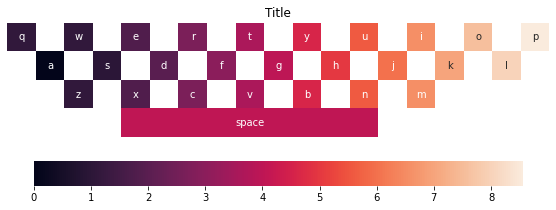

In [9]:
#HEATMAP - INTERACTIVE

labz = [
    ['q','','w','','e','','r','','t','','y','','u','','i','','o','','p'],
    ['','a','','s','','d','','f','','g','','h','','j','','k','','l',''],
    ['','','z','','x','','c','','v','','b','','n','','m','','','',''],
    ['','','','','','','','','space','','','','','','','','','','']
]

# in pivot: 'y' is the index of rows, 'x' index of columns and 'dist' the value
_ = df_heat.pivot('y', 'x', 'dist') # <--- Change here 'dist' to the column you want
plt.figure(figsize=(10,3))
plt.axis('off')
plt.title("Title")
sns.heatmap(_, annot=labz, fmt='', square=True, cbar_kws = dict(use_gridspec=False,location="bottom"))

In [13]:
#HEATMAP - GEN FILES

take_out = ['x', 'y', 'dist', 'View']

for col in df_heat.columns:
    if col in take_out:
        continue
    _ = df_heat.pivot('y', 'x', col) # col takes all values of letters
    plt.figure(figsize=(15,8))
    plt.axis('off')
    plt.title("Heatmap: " + col)
    sns.heatmap(_, annot=labz, fmt='', square=True, cbar_kws = dict(use_gridspec=False,location="bottom"))
    plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\heatmap\\" + col + "_heat.png", bbox_inches='tight')
    plt.close()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [13]:
# compare machine learning algorithms

models = []
models.append(('RFC', "RandomForestClassifier", RandomForestClassifier(n_estimators = 100, random_state = 42)))
models.append(('NB', "GaussianNB", GaussianNB()))
models.append(('SVM', "SVC", SVC(C=1.0, kernel='linear', gamma='auto', random_state=42)))
models.append(('CART', "DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)))
models.append(('ADA', "AdaBoostClassifier", AdaBoostClassifier(n_estimators=500, learning_rate=0.1)))
models.append(('LR', "LogisticRegression", LogisticRegression(solver='liblinear', random_state = 42)))
models.append(('KNN', "KNeighborsClassifier", KNeighborsClassifier(weights='distance', n_neighbors=30, n_jobs=-1)))

In [14]:
features = df.drop(['View','User','Hand', 'Smartphone', 'x', 'y','dist'], axis=1)
feature_list = list(features.columns)

# Convert to numpy array
labels = np.array(df['View'])
features = np.array(features)

# print(features)
# print(labels)

print(features.shape, labels.shape)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

print("Train:", len(X_train), len(y_train), "Test:", len(X_test), len(y_test))

# print number of occurrences for each letters
a, b = np.unique(y_test, return_counts=True)
print(dict(zip(a, b)))

# evaluate each model in turn
results = []
names = []
hue = []
predictions = []

y_pred_result = []

for name, full_name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

    y_pred_result.append(y_pred)
    predictions.append((full_name, y_pred))
    results.append(accuracy)
    names.append(name)
    hue.append(full_name + ": " + str(accuracy) + "%")

    print('%s: %f' % (name, accuracy))

(16762, 276) (16762,)
Train: 11733 11733 Test: 5029 5029
{' ': 812, 'a': 312, 'b': 70, 'c': 137, 'd': 137, 'e': 503, 'f': 89, 'g': 82, 'h': 151, 'i': 362, 'j': 69, 'k': 67, 'l': 149, 'm': 96, 'n': 238, 'o': 284, 'p': 123, 'q': 61, 'r': 198, 's': 219, 't': 290, 'u': 177, 'v': 70, 'w': 81, 'x': 65, 'y': 104, 'z': 83}
RFC: 39.430000
NB: 26.650000
SVM: 41.360000
CART: 25.670000
ADA: 18.450000
LR: 40.370000
KNN: 37.070000


In [16]:
# plot ACCURACY of ML Algorithm

graphData = pd.DataFrame({'names':names,'results':results, 'algorithm':hue})
fig = pyplot.figure(figsize=(24,14), dpi=100)
pyplot.title('Accuracy', fontweight='bold')
plt_bar = sns.barplot(x='names', y='results', data=graphData, hue='algorithm', dodge=False)
pyplot.xlabel("algorithm", fontweight='bold')
pyplot.ylabel("accuracy", fontweight='bold')
plt.yticks(np.arange(0, 105, 5), fontsize=15)
plt.xticks(fontsize=17)
plt.setp(plt_bar.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(plt_bar.get_legend().get_title(), fontsize='16', fontweight='bold') # for legend title
pyplot.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + "accuracyLeft.png",
               bbox_inches='tight')
# pyplot.show()
pyplot.close()

In [ ]:
# mod = AdaBoostClassifier()
# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# grid['algorithm'] = ['SAMME', 'SAMME.R']
# # define the evaluation procedure
# # define the grid search procedure
# grid_search = GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=sss, scoring='accuracy')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# mod = SVC(probability=True, shrinking=False, gamma='auto', decision_function_shape='ovo', C=1.0, kernel='linear', random_state=42)
# # define the grid of values to search
# grid = dict()
# # grid['C'] = [0.001, 0.01, 0.1, 1.0]
# # grid['kernel'] = ['linear', 'rbf', 'sigmoid', 'poly']
# # grid['degree'] = [3, 4, 5]
# # grid['gamma'] = ['auto', 'scale']
# # grid['shrinking'] = [True, False]
# # grid['probability'] = [True, False]
# # grid['decision_function_shape'] = ['ovo', 'ovr']
# grid['break_ties'] = [True, False]
# # define the evaluation procedure
# # define the grid search procedure
# grid_search = GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=sss, scoring='accuracy')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# mod = LogisticRegression(random_state=42, multi_class='auto')
# # define the grid of values to search
# grid = dict()
# grid['C'] = [0.001, 0.01, 0.1, 1.0]
# grid['solver'] = ['linear', 'newton-cg', 'lbfgs', 'saga']
# # define the evaluation procedure
# # define the grid search procedure
# grid_search = GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=sss, scoring='accuracy')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# mod = DecisionTreeClassifier(random_state=42)
# # define the grid of values to search
# grid = dict()
# grid['splitter'] = ['best', 'random']
# grid['max_features'] = ['auto', 'sqrt', 'log2', None]
# # define the evaluation procedure
# # define the grid search procedure
# grid_search = GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=sss, scoring='accuracy')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# mod = KNeighborsClassifier(n_jobs=-1)
# # define the grid of values to search
# grid = dict()
# grid['n_neighbors'] = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
#                        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
# grid['weights'] = ['uniform', 'distance']
# grid['algorithm'] = ['auto', 'ball_tree', 'kd_tree', 'brute']
# # define the evaluation procedure
# # define the grid search procedure
# grid_search = GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=sss, scoring='accuracy')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

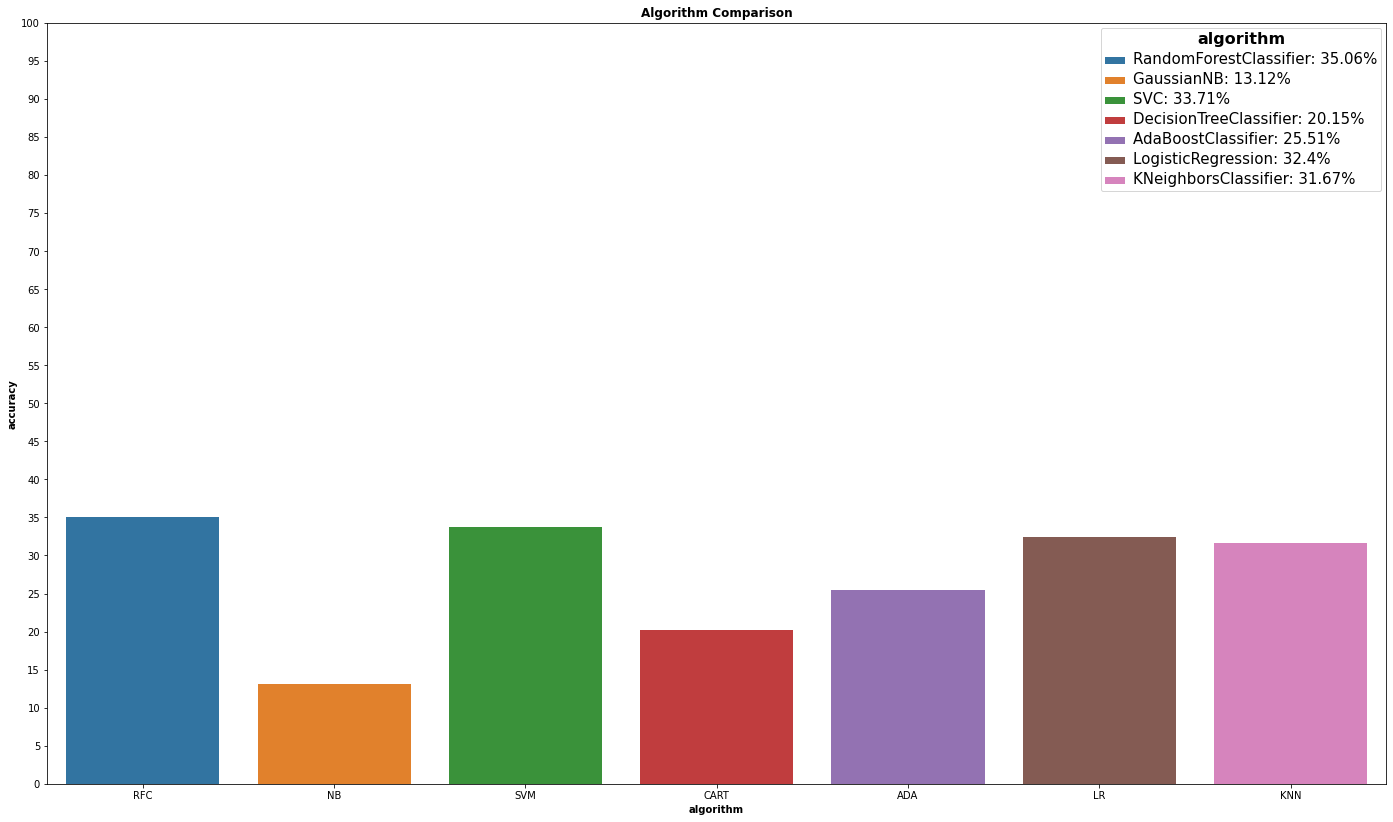

In [29]:
# mod = RandomForestClassifier(random_state=42)
# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['min_samples_leaf'] = [1, 75]
# # define the evaluation procedure
# # define the grid search procedure
# grid_search = GridSearchCV(estimator=mod, param_grid=grid, n_jobs=-1, cv=sss, scoring='accuracy')
# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score

In [17]:

idx = [17, 23, 1, 5, 19, 26, 18, 4, 24, 20, 6, 3, 25, 7, 22, 0, 21, 8, 2, 9, 10, 14, 15, 11, 13, 16, 12]

labels_order = a[idx]

ticklabels = [i for i in "QWAESZRDXTFCYGV UHBIJNOKMPL"]
zip_labels = list(zip(idx, ticklabels))

In [24]:
# plot CONFUSION MATRIX not scaled

copy_conf = []

for name, prediction in predictions:

    c, d = np.unique(prediction, return_counts=True)
    # print(dict(zip(c, d)))

    conf_matrix = confusion_matrix(y_test, prediction, labels=labels_order)

    copy_conf.append((name, conf_matrix))

    print(name)

    # number of letters for each rows
    # print(name, list(map(sum, conf_matrix)))

    # number of letters for each columns
    # print(name, [sum(conf_matrix[:,i]) for i in range(27)])

    df_cm = pd.DataFrame(conf_matrix, index = idx, columns = idx)

    plt.figure(figsize = (24,14), dpi=100)
    sns.set(font_scale=1)

    sns.heatmap(df_cm, annot=True, yticklabels=zip_labels, xticklabels=ticklabels, annot_kws={"fontsize":10})

    plt.title("confusion_matrix: " + name, fontweight='bold')
    plt.ylabel("actual", fontweight='bold')
    plt.xlabel("predicted", fontweight='bold')

    plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\confusion_matrix\\non scalati\\" + name +
                "_confusion_matrix.png", bbox_inches='tight')

    plt.close()

RandomForestClassifier
GaussianNB
SVC
DecisionTreeClassifier
AdaBoostClassifier
LogisticRegression
KNeighborsClassifier


In [19]:
# plot CONFUSION MATRIX scaled

copy_conf_scaled = []

for name, prediction in predictions:

    c, d = np.unique(prediction, return_counts=True)
    # print(dict(zip(c, d)))

    conf_matrix = confusion_matrix(y_test, prediction, labels=labels_order)

    conf_scaled = (conf_matrix.astype(float)/conf_matrix.astype(float).sum(axis=1)[:, np.newaxis]) * 100

    copy_conf_scaled.append((name, conf_scaled))

    # print(name, list(map(sum, conf_scaled)))

    df_cm = pd.DataFrame(conf_scaled, index = idx, columns = idx)

    plt.figure(figsize = (24,14), dpi=100)
    sns.set(font_scale=1)

    sns.heatmap(df_cm, annot=True, yticklabels=zip_labels, xticklabels=ticklabels, annot_kws={"fontsize":10})

    plt.title("confusion_matrix: " + name, fontweight='bold')
    plt.ylabel("actual", fontweight='bold')
    plt.xlabel("predicted", fontweight='bold')

    plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\confusion_matrix\\scalati\\" + name +
                "_confusion_matrix.png", bbox_inches='tight')

    plt.close()

In [20]:
# keyboard = [('q', 0), ('w', 1), ('a', 1), ('e', 2), ('s', 2), ('z', 2), ('r', 3), ('d', 3), ('x', 3), ('t', 4), ('f', 4),
#             ('c', 4), ('y', 5), ('g', 5), ('v', 5), (' ', 5), ('u', 6), ('h', 6), ('b', 6), ('i', 7), ('j', 7), ('n', 7),
#             ('o', 8), ('k', 8), ('m', 8), ('p', 9), ('l', 9)]

# distances of each letter from the others

nArr2D = np.array(copy_conf)
keyboard_q = [0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 4, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9]
keyboard_w = [1, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 3, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8]
keyboard_a = [1, 1, 0, 2, 1, 1, 3, 2, 2, 4, 3, 3, 5, 4, 4, 3, 6, 5, 5, 7, 6, 6, 8, 7, 7, 9, 8]
keyboard_e = [2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7]
keyboard_s = [2, 1, 1, 1, 0, 1, 2, 1, 1, 3, 2, 2, 4, 3, 3, 2, 5, 4, 4, 6, 5, 5, 7, 6, 6, 8, 7]
keyboard_z = [2, 2, 1, 2, 1, 0, 2, 1, 1, 3, 2, 2, 4, 3, 3, 2, 5, 4, 4, 6, 5, 5, 7, 6, 6, 8, 7]
keyboard_r = [3, 2, 3, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6]
keyboard_d = [3, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 3, 2, 2, 2, 4, 3, 3, 5, 4, 4, 6, 5, 5, 7, 6]
keyboard_x = [3, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 2, 2, 1, 4, 3, 3, 5, 4, 4, 6, 5, 5, 7, 6]
keyboard_t = [4, 3, 4, 2, 3, 3, 1, 2, 2, 0, 1, 2, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5]
keyboard_f = [4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 3, 2, 2, 4, 3, 3, 5, 4, 4, 6, 5]
keyboard_c = [4, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 3, 2, 2, 4, 3, 3, 5, 4, 4, 6, 5]
keyboard_y = [5, 4, 5, 3, 4, 4, 2, 3, 3, 1, 2, 2, 0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4]
keyboard_g = [5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 3, 2, 2, 4, 3, 3, 5, 4]
keyboard_v = [5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 3, 2, 2, 4, 3, 3, 5, 4]
keyboard_  = [4, 3, 3, 3, 2, 2, 3, 2, 1, 3, 2, 1, 3, 2, 1, 0, 3, 2, 1, 3, 2, 1, 3, 2, 2, 4, 3]
keyboard_u = [6, 5, 6, 4, 5, 5, 3, 4, 4, 2, 3, 3, 1, 2, 2, 3, 0, 1, 2, 1, 1, 2, 2, 2, 2, 3, 3]
keyboard_h = [6, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 3, 2, 2, 4, 3]
keyboard_b = [6, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 3, 2, 2, 4, 3]
keyboard_i = [7, 6, 7, 5, 6, 6, 4, 5, 5, 3, 4, 4, 2, 3, 3, 3, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 2]
keyboard_j = [7, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 3, 2]
keyboard_n = [7, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 2]
keyboard_o = [8, 7, 8, 6, 7, 7, 5, 6, 6, 4, 5, 5, 3, 4, 4, 3, 2, 3, 3, 1, 2, 2, 0, 1, 2, 1, 1]
keyboard_k = [8, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1]
keyboard_m = [8, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1]
keyboard_p = [9, 8, 9, 7, 8, 8, 6, 7, 7, 5, 6, 6, 4, 5, 5, 4, 3, 4, 4, 2, 3, 3, 1, 2, 2, 0, 1]
keyboard_l = [9, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0]


keyboard = [keyboard_q, keyboard_w, keyboard_a, keyboard_e, keyboard_s, keyboard_z, keyboard_r, keyboard_d, keyboard_x,
            keyboard_t, keyboard_f, keyboard_c, keyboard_y, keyboard_g, keyboard_v, keyboard_, keyboard_u, keyboard_h,
            keyboard_b, keyboard_i, keyboard_j, keyboard_n, keyboard_o, keyboard_k, keyboard_m, keyboard_p, keyboard_l]

C:\Users\giuli\AppData\Local\Temp/ipykernel_3936/1748257599.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nArr2D = np.array(copy_conf)


In [21]:
# create new matrix with distance

def matrix_distance(m_distance):
    actual = 0
    row_conf = 0
    new_matrix = []
    matrix_to_return = []
    indexes = []
    summ = []

    for name, c_matrix in m_distance:
        for keyb in keyboard:
            for i in range(0, max(keyb)+1):
                for j in keyb:
                    if i == j:
                        indexes.append(actual)
                    actual += 1

                # print(indexes)
                sum_values = sum(c_matrix[row_conf][indexes])
                summ.append(sum_values)
                indexes = []
                actual = 0
            row_conf += 1

            new_matrix.append(summ)
            summ = []

        matrix_to_return.append((name, new_matrix))
        new_matrix = []
        row_conf = 0

    return matrix_to_return


# print(matrix_distance(copy_conf))

In [22]:
# create plot of matrix with distance

def create_plot_distance(copy_matrix, path_file):

    for name_alg, matrix in matrix_distance(copy_matrix):

        conf_matrix_distance = pd.DataFrame(matrix, index = idx, columns = range(0, 10))

        plt.figure(figsize = (24,14), dpi=100)
        sns.set(font_scale=1)

        sns.heatmap(conf_matrix_distance, annot=True, yticklabels=zip_labels, xticklabels=range(0, 10), annot_kws={"fontsize":10}, fmt='.0f')

        plt.title(name_alg + "_distance", fontweight='bold')
        plt.ylabel("actual", fontweight='bold')
        plt.xlabel("distance", fontweight='bold')

        plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\confusion_matrix\\" + path_file + "\\" + name_alg +
                        "_distance.png", bbox_inches='tight')

        plt.close()

In [23]:
create_plot_distance(copy_conf, "distanze non scalate")
create_plot_distance(copy_conf_scaled, "distanze scalate")

In [20]:
# plot F1-SCORE, PRECISION and RECALL

alphabet = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# set width of bars
bar_width = 0.25

for name, prediction in predictions:
    print(name)
    report = classification_report(y_test, prediction, output_dict=True)
    data_report = pd.DataFrame(report).transpose()
    precision = round(data_report.loc[:, 'precision'], 2)
    recall = round(data_report.loc[:, 'recall'], 2)
    f_score = round(data_report.loc[:, 'f1-score'], 2)
    prec = precision.head(27)
    rec = recall.head(27)
    f = f_score.head(27)

    # print(name, f1_score(y_test, prediction, average=None))

    # Set position of bar on X axis
    r1 = np.arange(27)
    r2 = [xindex + bar_width for xindex in r1]
    r3 = [xindex + bar_width for xindex in r2]

    # Make the plot
    plt.figure(figsize = (24,14), dpi=100)
    plt.bar(r1, prec, width=bar_width, edgecolor='white', label='precision')
    plt.bar(r2, rec, width=bar_width, edgecolor='white', label='recall')
    plt.bar(r3, f, width=bar_width, edgecolor='white', label='f1-score')

    # Add xticks and yticks on the middle of the group bars
    # plt.xlabel('labels', fontweight='bold')
    plt.title("Precision, Recall, F1 Score: " + name, fontweight='bold')
    plt.yticks(np.arange(0, 1.05, 0.05), fontsize=15)
    plt.xticks([r + bar_width for r in range(27)], alphabet, fontsize=20)

    # create legend, save graphic
    plt.legend(prop={"size":20})

    plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\f_score\\" + name + "_f_score.png",
                bbox_inches='tight')
    plt.close()

RandomForestClassifier


c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
SVC


c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier
AdaBoostClassifier


c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression
KNeighborsClassifier


c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
